#**Analysis of Churn Customer**

##Introduction

Interconnect is telecomunication company that focus on landline and internet service. Aside from those two services, it also offers other service such as Internet Security, Tech Support, Cloud Storage, Online Backup and Streaming Service.

In order to maintain the business stays profitable, the company decided to deepen analize their customers by forecast their churn rate. Any potential churn client will be offer promotion code and special package to keep them using the service.

The marketing team has been gathered the data needed to run the analysis such as client information, contract and current service.

##Goal

The goals of this project are as below:
1. Having a proper machine learning model to predict client churn with AUC-ROC as main metric with score exceeding or equal to 0.88.
2. Having F1 score as additional metric.
3. Having statistic calculation and visualization the findings.
4. Having comparation behaviour of telephone and internet users.

##Steps

The steps of this project are as below:
1. Load the data and study the general information.
2. Explore and analysis the data.
3. Prepare the data if anomalies were found & check the class balance.
4. Create machine learning model & train the model while maintain AUC-ROC score above or equal to 0.88.
5. Draw the conclusion.




###Data Loadment

In [ ]:
#Data Manipulation and Analysis Libraries
import pandas as pd
import numpy as np

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loading Dataset
path_contract = '/content/contract.csv'
path_personal = '/content/personal.csv'
path_internet = '/content/internet.csv'
path_phone = '/content/phone.csv'

data_contract = pd.read_csv(path_contract)
data_personal = pd.read_csv(path_personal)
data_internet = pd.read_csv(path_internet)
data_phone = pd.read_csv(path_phone)

####Data Contract

Understand and checking the general information of the data and looking for anomalies of data contract.

In [ ]:
data_contract.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15


In [ ]:
data_contract.shape

(7043, 8)

In [ ]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
data_contract.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
data_contract.duplicated().sum()

0

- Since the date data are originally have the type of object, we can convert into datetime type in case we will use it for future analysis.
- The type of the data in column TotalCharges is object and we can convert it into float.


In [ ]:
data_contract['BeginDate'] = pd.to_datetime(data_contract['BeginDate'], format='%Y-%m-%d', errors='coerce')
data_contract['EndDate'] = pd.to_datetime(data_contract['EndDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
data_contract['TotalCharges'] = pd.to_numeric(data_contract['TotalCharges'], errors='coerce').astype('float64')

In [ ]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [ ]:
data_contract.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15


Columns of Data Contract:
1. **customerID**: A unique identifier assigned to each customer.
2. **BeginDate**: The date when the customer's contract started.
3. **EndDate**: The date when the customer's contract ended, if its an active customer the column filled with NaT.
4. **Type**: The type of contract the customer has signed up for. This could indicate the duration (e.g., month-to-month, one year, two years) or the nature of the service package.
5. **PaperlessBilling**: Indicates whether the customer has opted for paperless billing.
6. **PaymentMethod**:The method chosen by the customer to make payments.
7. **MonthlyCharges**: The amount charged to the customer every month for the services provided.
8. **TotalCharges**: The total amount charged to the customer over the course of their contract.

####Data Personal

Understand and checking the general information of the data and looking for anomalies of data personal.

In [ ]:
data_personal.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


In [ ]:
data_personal.shape

(7043, 5)

In [ ]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
data_personal.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [ ]:
data_personal.duplicated().sum()

0

Columns of Data Personal:

1. **customerID**: A unique identifier assigned to each customer.
2. **gender**: The gender of the custumers.
3. **SeniorCitizen**: Boolean data that indicated whether the customer is a senior citizen or not where 1 means yes and 0 means no.
4. **Partner**: Binary data that indicates whether the customer has a partner or spouse.
5. **Dependents**: Binary data that indicates whether the customer has dependents (such as children or other family members they care for).

####Data Internet

Understand and checking the general information of the data and looking for anomalies of data internet.

In [ ]:
data_internet.head(3)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No


In [ ]:
data_internet.shape

(5517, 8)

In [ ]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
data_internet.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [ ]:
data_internet.duplicated().sum()

0

Columns of Data Internet:

1. **customerID**: A unique identifier assigned to each customer.
2. **InternetService**: Indicates the type of internet service the customer subscribes to.
3. **OnlineSecurity**: Binary data that indicates whether the customer has subscribed to an online security service.
4. **OnlineBackup**: Binary data that indicates whether the customer has subscribed to an online backup service.
5. **DeviceProtection**: Binary data that indicates whether the customer has subscribed to a device protection service.
6. **TechSupport**: Binary data that indicates whether the customer has access to technical support.
7. **StreamingTV**: Binary data that indicates whether the customer subscribes to a TV streaming service.
8. **StreamingMovies**: Binary data that indicates whether the customer subscribes to a movie streaming service.

####Data Phone

Understand and checking the general information of the data and looking for anomalies of data personal.

In [ ]:
data_phone.head(3)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


In [ ]:
data_phone.shape

(6361, 2)

In [ ]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
data_phone.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

In [ ]:
data_phone.duplicated().sum()

0

Columns of Data Internet:

1. **customerID**: A unique identifier assigned to each customer.
2. **MultipleLines**: Binary data that indicates whether the customer has multiple phone lines.

###Exploratory Data Analysis

Since data study has been conducted and anomalies were fixed, exploratory and analysis need to be done in order to have brief understanding of the existing condition of Interconnect customer.

Merge data in order to make the analysis easier by combining all 4 data using inner merge on customerID. Inner merge will be use to avoid the empty information if a difference found in customerID in each data.


In [ ]:
data = pd.merge(data_personal, data_internet, on='customerID', how='inner')

In [ ]:
data.shape

(5517, 12)

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data = pd.merge(data_phone, data, on='customerID', how='inner')

In [ ]:
data.shape

(4835, 13)

In [ ]:
data.isnull().sum()

customerID          0
MultipleLines       0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [ ]:
data = pd.merge(data_contract, data, on='customerID', how='inner')

In [ ]:
data.shape

(4835, 20)

In [ ]:
data.isnull().sum()

customerID             0
BeginDate              0
EndDate             3249
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           3
MultipleLines          0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
dtype: int64

In [ ]:
data['EndDate'].unique()

<DatetimeArray>
[                'NaT', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
 '2019-10-01 00:00:00', '2020-01-01 00:00:00']
Length: 5, dtype: datetime64[ns]

The null data in column EndDate means the customer is an active customer. In order to have better understanding, we will fill the null value with 0 to further indicate in additional column of binary value that 0 means active customer and 1 means churn customer.

In [ ]:
data['EndDate'] = data['EndDate'].fillna(0)

In [ ]:
data.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Female,0,No,No,Fiber optic,No,No,No,No,No,No


We will add new column named churn to be fill with binary value of 0 and 1 where 1 means churn and 0 means active customer.

In [ ]:
data['churn'] = data['EndDate'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
data.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,churn
0,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,0
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,1
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Female,...,No,No,Fiber optic,No,No,No,No,No,No,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        4835 non-null   object        
 1   BeginDate         4835 non-null   datetime64[ns]
 2   EndDate           4835 non-null   object        
 3   Type              4835 non-null   object        
 4   PaperlessBilling  4835 non-null   object        
 5   PaymentMethod     4835 non-null   object        
 6   MonthlyCharges    4835 non-null   float64       
 7   TotalCharges      4832 non-null   float64       
 8   MultipleLines     4835 non-null   object        
 9   gender            4835 non-null   object        
 10  SeniorCitizen     4835 non-null   int64         
 11  Partner           4835 non-null   object        
 12  Dependents        4835 non-null   object        
 13  InternetService   4835 non-null   object        
 14  OnlineSecurity    4835 n

####Churn Custumer vs Average Charges

In [ ]:
graph_1 = pd.pivot_table(data, index='churn', values=['MonthlyCharges', 'TotalCharges'], aggfunc='mean').reset_index()
graph_1['churn'] = graph_1['churn'].replace({1: 'churn customer', 0: 'active customer'})
graph_1

,churn,MonthlyCharges,TotalCharges
0,active customer,81.51362,3480.67463
1,churn customer,82.25000,1719.08512


In [ ]:
data['Active'] = data['churn'].apply(lambda x: 'Yes' if x == 0 else 'No')

In [ ]:
data.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,churn,Active
0,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,DSL,Yes,No,Yes,No,No,No,0,Yes
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,Male,...,No,DSL,Yes,Yes,No,No,No,No,1,No
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Female,...,No,Fiber optic,No,No,No,No,No,No,1,No


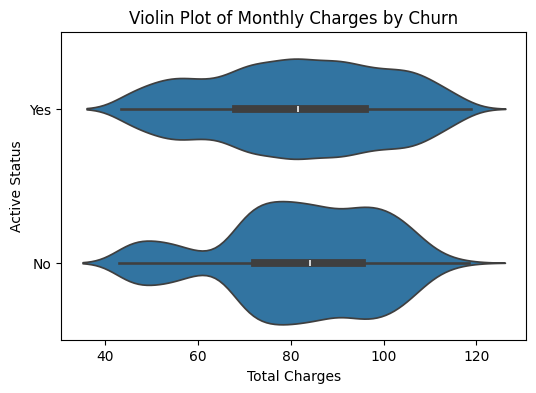

In [ ]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=data, x='MonthlyCharges', y='Active')

plt.title('Violin Plot of Monthly Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Active Status')
plt.show()

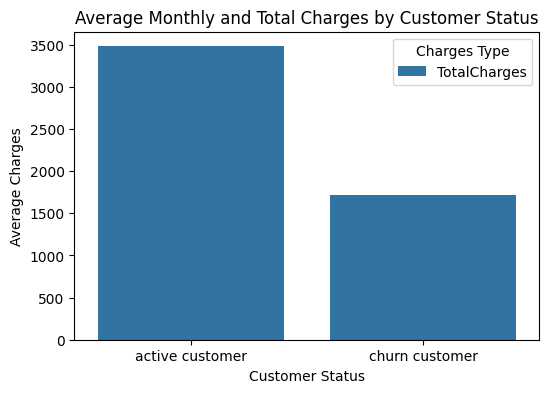

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='churn', y='value', hue='variable',
            data=pd.melt(graph_1, id_vars='churn', value_vars=['TotalCharges']))

plt.title('Average Monthly and Total Charges by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Average Charges')
plt.legend(title='Charges Type')
plt.show()

Finding:

1. Active customer have almost the same monthly spending and more on total spending. This could happenned by factor like the time of the data being retrieved and churn customer no longer pay for service.
2. Churn customer tend to pay more compare to active customer where we can study from the violin plot.

####Churn Customer vs Type of Contract

In [ ]:
graph_2 = pd.pivot_table(data, index='Type', columns='churn', values='customerID', aggfunc='count')
graph_2 = graph_2[[1]].rename(columns={1: 'Total_Churn'})
graph_2 = graph_2.reset_index()
graph_2

churn,Type,Total_Churn
0,Month-to-month,1403
1,One year,143
2,Two year,40


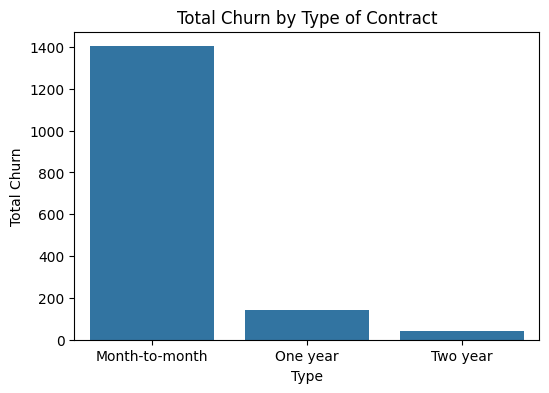

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Type', y='Total_Churn', data=graph_2)
plt.title('Total Churn by Type of Contract')
plt.xlabel('Type')
plt.ylabel('Total Churn')
plt.show()

Finding:

1. Customer that renew the contract monthly tend to terminate the service.
2. This could happened because the customer would like to do a trial of one month to experience the service provided.

####Churn Customer vs Payment Method

In [ ]:
graph_3 = pd.pivot_table(data, index='PaymentMethod', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_3 = graph_3[['PaymentMethod', 1]].rename(columns={1: 'Total_Churn'}).reset_index()
graph_3 = graph_3.sort_values(by='Total_Churn', ascending=False).reset_index(drop=True)
graph_3

churn,index,PaymentMethod,Total_Churn
0,2,Electronic check,960
1,0,Bank transfer (automatic),219
2,1,Credit card (automatic),204
3,3,Mailed check,203


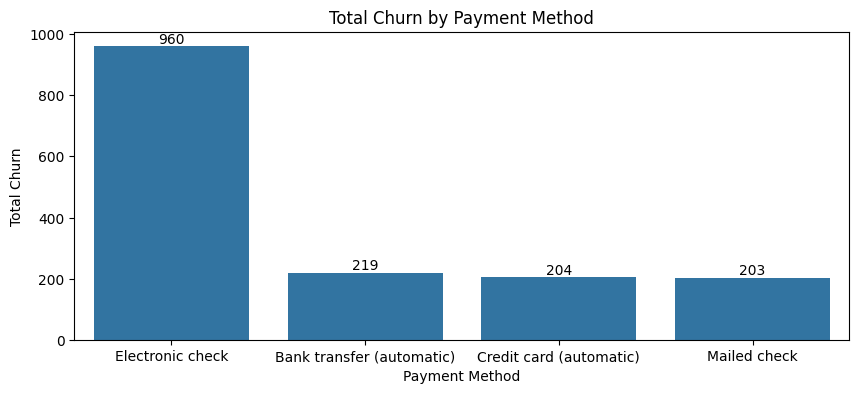

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='PaymentMethod', y='Total_Churn', data=graph_3)

for index, row in graph_3.iterrows():
    plt.text(index, row['Total_Churn'], str(row['Total_Churn']), ha='center', va='bottom')

plt.title('Total Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Churn')
plt.show()

In [ ]:
graph_3b = pd.pivot_table(data, index='PaymentMethod', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_3b = graph_3b[['PaymentMethod', 0]].rename(columns={0: 'Active_Customer'}).reset_index()
graph_3b = graph_3b.sort_values(by='Active_Customer', ascending=False).reset_index(drop=True)
graph_3b

churn,index,PaymentMethod,Active_Customer
0,2,Electronic check,1057
1,0,Bank transfer (automatic),850
2,1,Credit card (automatic),833
3,3,Mailed check,509


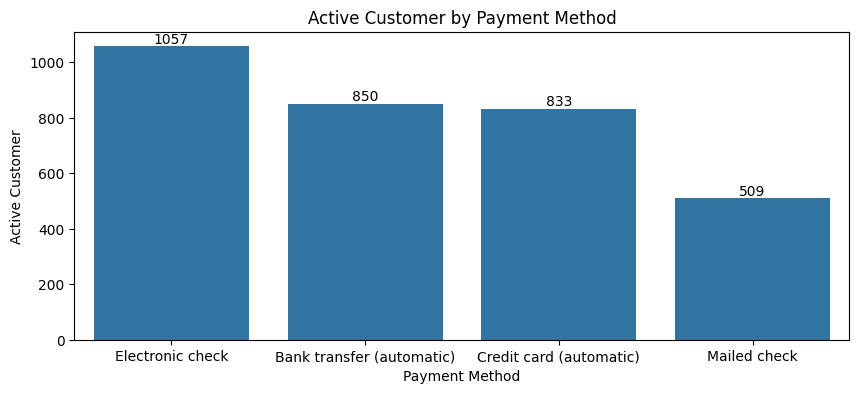

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='PaymentMethod', y='Active_Customer', data=graph_3b)

for index, row in graph_3b.iterrows():
    plt.text(index, row['Active_Customer'], str(row['Active_Customer']), ha='center', va='bottom')

plt.title('Active Customer by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Active Customer')
plt.show()

Finding:

1. The finding in churn customer vs type of contract validated by their payment method where it tend to pay manually instead of autodebit.
2. The active customer tend not to have any significant differences behaviour in paying their subscription.

####Churn Customer vs Gender

In [ ]:
graph_4 = pd.pivot_table(data, index='gender', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_4 = graph_4[['gender', 1]].rename(columns={1: 'Total_Churn'}).reset_index()
graph_4 = graph_4.sort_values(by='Total_Churn', ascending=False).reset_index(drop=True)
graph_4

churn,index,gender,Total_Churn
0,0,Female,803
1,1,Male,783


Finding:

1. There is no significant different between male and female in term of cancelation of service.

####Churn Customer vs Senior Citizen

In [ ]:
graph_5 = pd.pivot_table(data, index='SeniorCitizen', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_5 = graph_5[['SeniorCitizen', 1]].rename(columns={1: 'Total_Churn'}).reset_index()
graph_5 = graph_5.sort_values(by='Total_Churn', ascending=False).reset_index(drop=True)
graph_5

churn,index,SeniorCitizen,Total_Churn
0,0,0,1159
1,1,1,427


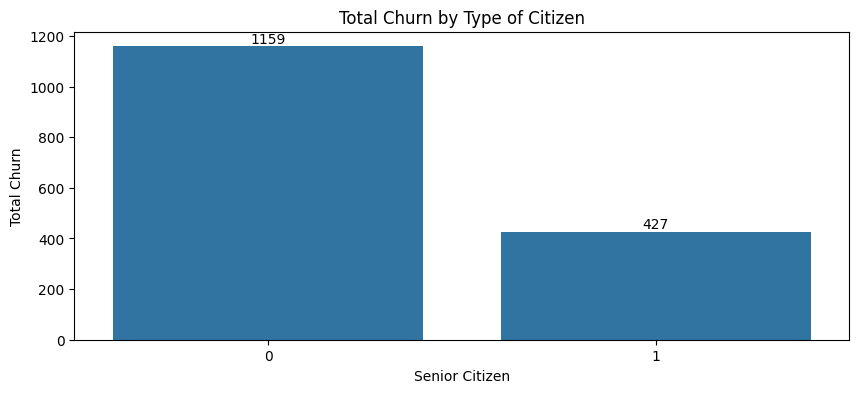

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='SeniorCitizen', y='Total_Churn', data=graph_5)

for index, row in graph_5.iterrows():
    plt.text(index, row['Total_Churn'], str(row['Total_Churn']), ha='center', va='bottom')

plt.title('Total Churn by Type of Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Total Churn')
plt.show()

In [ ]:
graph_5b = pd.pivot_table(data, index='SeniorCitizen', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_5b = graph_5b[['SeniorCitizen', 0]].rename(columns={0: 'Active_Customer'}).reset_index()
graph_5b = graph_5b.sort_values(by='Active_Customer', ascending=False).reset_index(drop=True)
graph_5b

churn,index,SeniorCitizen,Active_Customer
0,0,0,2690
1,1,1,559


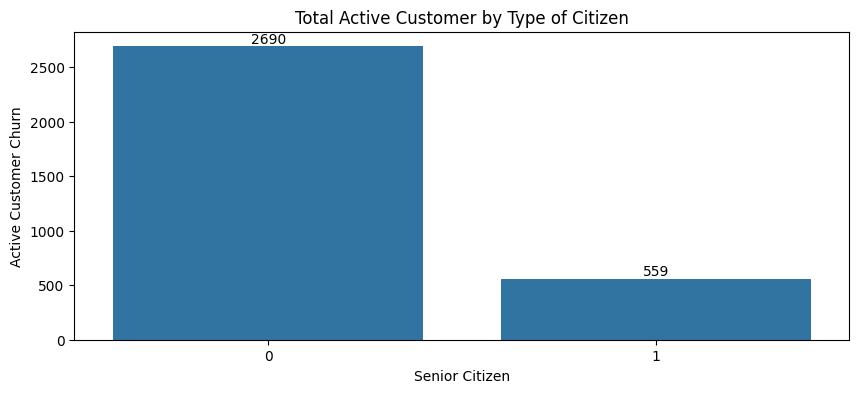

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='SeniorCitizen', y='Active_Customer', data=graph_5b)

for index, row in graph_5b.iterrows():
    plt.text(index, row['Active_Customer'], str(row['Active_Customer']), ha='center', va='bottom')

plt.title('Total Active Customer by Type of Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Active Customer Churn')
plt.show()

Finding:

1. There is no significant differences in terms of whether its senior citizen or not in case of cancelation of service.

####Churn Customer vs Partnership

In [ ]:
graph_6 = pd.pivot_table(data, index='Partner', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_6

churn,Partner,0,1
0,No,1475,1007
1,Yes,1774,579


In [ ]:
graph_6 = pd.pivot_table(data, index='Partner', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_6 = graph_6[['Partner', 1]].rename(columns={1: 'Total_Churn'}).reset_index()
graph_6 = graph_6.sort_values(by='Total_Churn', ascending=False).reset_index(drop=True)
graph_6

churn,index,Partner,Total_Churn
0,0,No,1007
1,1,Yes,579


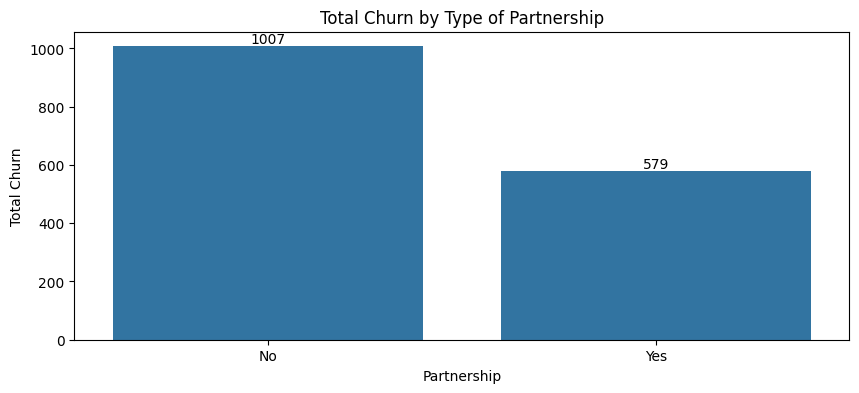

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Partner', y='Total_Churn', data=graph_6)

for index, row in graph_6.iterrows():
    plt.text(index, row['Total_Churn'], str(row['Total_Churn']), ha='center', va='bottom')

plt.title('Total Churn by Type of Partnership')
plt.xlabel('Partnership')
plt.ylabel('Total Churn')
plt.show()

Findings:

1. There is no significant differences in terms of whether its in partnership or not in case of cancelation of service.

####Churn Customer vs Dependenship

In [ ]:
graph_7 = pd.pivot_table(data, index='Dependents', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_7

churn,Dependents,0,1
0,No,2263,1311
1,Yes,986,275


In [ ]:
graph_7 = pd.pivot_table(data, index='Dependents', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_7 = graph_7[['Dependents', 1]].rename(columns={1: 'Total_Churn'}).reset_index()
graph_7 = graph_7.sort_values(by='Total_Churn', ascending=False).reset_index(drop=True)
graph_7

churn,index,Dependents,Total_Churn
0,0,No,1311
1,1,Yes,275


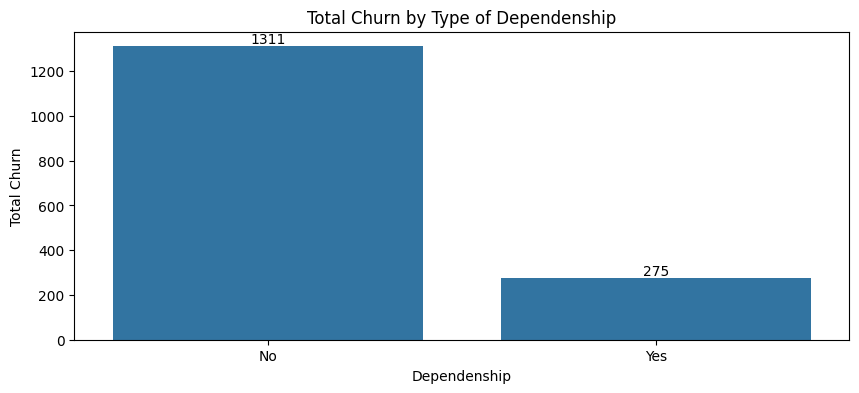

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Dependents', y='Total_Churn', data=graph_7)

for index, row in graph_7.iterrows():
    plt.text(index, row['Total_Churn'], str(row['Total_Churn']), ha='center', va='bottom')

plt.title('Total Churn by Type of Dependenship')
plt.xlabel('Dependenship')
plt.ylabel('Total Churn')
plt.show()

In [ ]:
graph_7b = pd.pivot_table(data, index='Dependents', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_7b = graph_7b[['Dependents', 1]].rename(columns={1: 'Active_Customer'}).reset_index()
graph_7b = graph_7b.sort_values(by='Active_Customer', ascending=False).reset_index(drop=True)
graph_7b

churn,index,Dependents,Active_Customer
0,0,No,1311
1,1,Yes,275


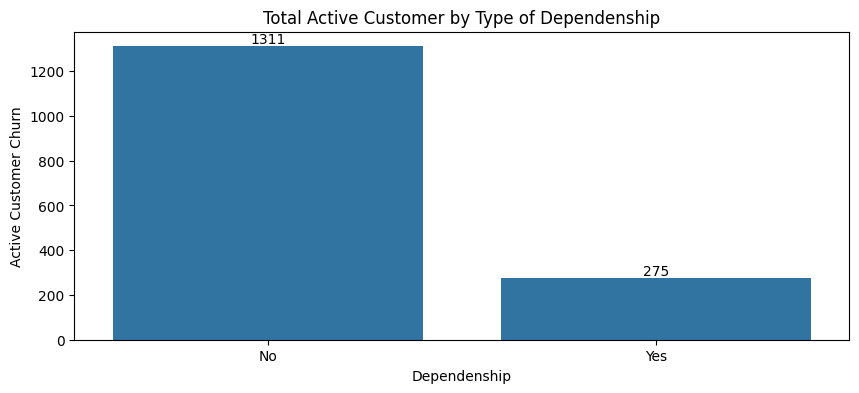

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Dependents', y='Active_Customer', data=graph_7b)

for index, row in graph_7b.iterrows():
    plt.text(index, row['Active_Customer'], str(row['Active_Customer']), ha='center', va='bottom')

plt.title('Total Active Customer by Type of Dependenship')
plt.xlabel('Dependenship')
plt.ylabel('Active Customer Churn')
plt.show()

Finding:

1. There is no significant differences in terms of whether its has any dependenship or not in case of cancelation of service.

####Churn Customer vs Lines Services

In [ ]:
graph_8 = pd.pivot_table(data, index='MultipleLines', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_8

churn,MultipleLines,0,1
0,No,1460,746
1,Yes,1789,840


In [ ]:
graph_8 = pd.pivot_table(data, index='MultipleLines', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_8 = graph_8[['MultipleLines', 1]].rename(columns={1: 'Total_Churn'}).reset_index()
graph_8 = graph_8.sort_values(by='Total_Churn', ascending=False).reset_index(drop=True)
graph_8

churn,index,MultipleLines,Total_Churn
0,1,Yes,840
1,0,No,746


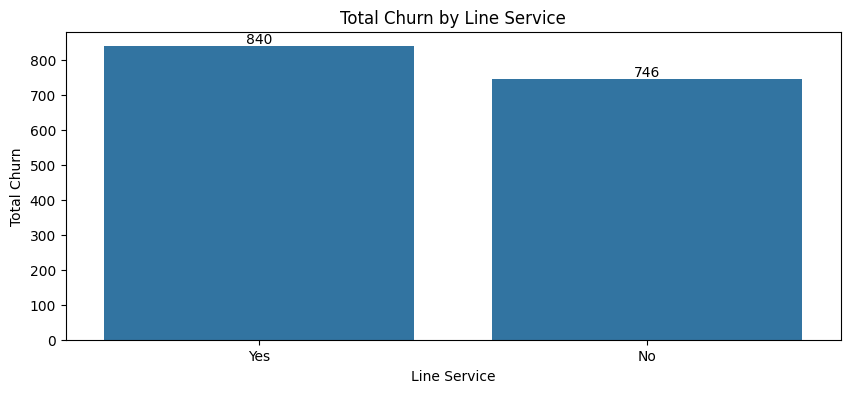

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='MultipleLines', y='Total_Churn', data=graph_8)

for index, row in graph_8.iterrows():
    plt.text(index, row['Total_Churn'], str(row['Total_Churn']), ha='center', va='bottom')

plt.title('Total Churn by Line Service')
plt.xlabel('Line Service')
plt.ylabel('Total Churn')
plt.show()

Finding:

1. There is no significant differences in type of line service in case of cancelation of service.

####Churn Customer vs Add-on Service

#####Internet Service

In [ ]:
graph_9 = pd.pivot_table(data, index='InternetService', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_9

churn,InternetService,0,1
0,DSL,1450,289
1,Fiber optic,1799,1297


In [ ]:
graph_9 = pd.pivot_table(data, index='InternetService', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_9 = graph_9[['InternetService', 1]].rename(columns={1: 'Total_Churn'}).reset_index()
graph_9 = graph_9.sort_values(by='Total_Churn', ascending=False).reset_index(drop=True)
graph_9

churn,index,InternetService,Total_Churn
0,1,Fiber optic,1297
1,0,DSL,289


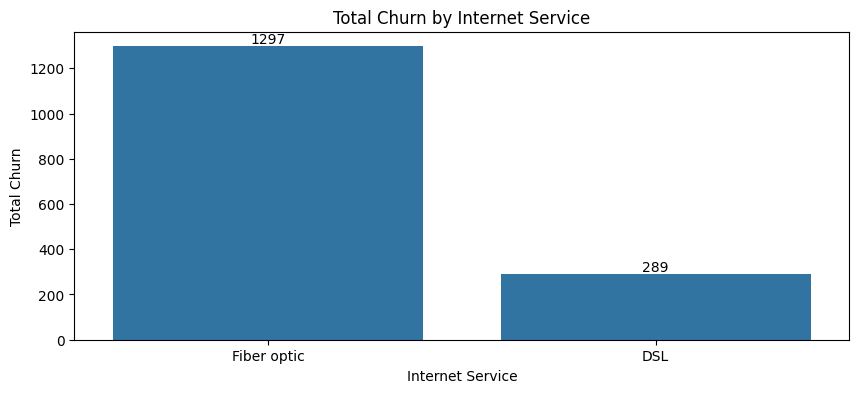

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='InternetService', y='Total_Churn', data=graph_9)

for index, row in graph_9.iterrows():
    plt.text(index, row['Total_Churn'], str(row['Total_Churn']), ha='center', va='bottom')

plt.title('Total Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Total Churn')
plt.show()

#####TV Streaming

In [ ]:
graph_10 = pd.pivot_table(data, index='StreamingTV', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_10

churn,StreamingTV,0,1
0,No,1577,836
1,Yes,1672,750


In [ ]:
graph_10 = pd.pivot_table(data, index='StreamingTV', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_10 = graph_10[['StreamingTV', 1]].rename(columns={1: 'Total_Churn'}).reset_index()
graph_10 = graph_10.sort_values(by='Total_Churn', ascending=False).reset_index(drop=True)
graph_10

churn,index,StreamingTV,Total_Churn
0,0,No,836
1,1,Yes,750


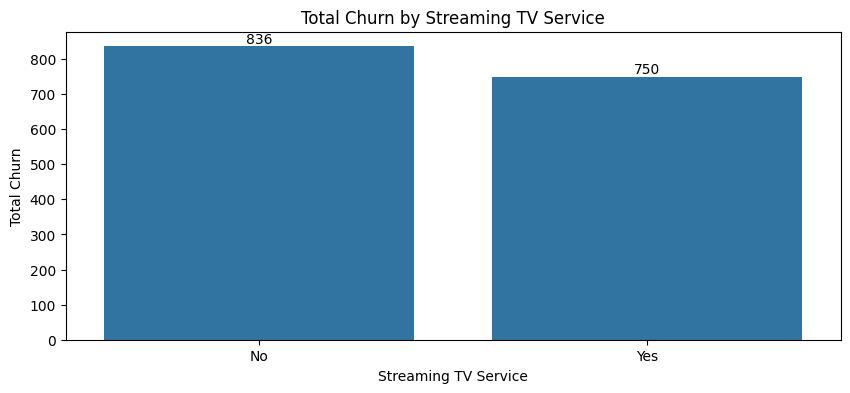

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='StreamingTV', y='Total_Churn', data=graph_10)

for index, row in graph_10.iterrows():
    plt.text(index, row['Total_Churn'], str(row['Total_Churn']), ha='center', va='bottom')

plt.title('Total Churn by Streaming TV Service')
plt.xlabel('Streaming TV Service')
plt.ylabel('Total Churn')
plt.show()

#####Technical Support

In [ ]:
graph_11 = pd.pivot_table(data, index='TechSupport', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_11

churn,TechSupport,0,1
0,No,1776,1304
1,Yes,1473,282


In [ ]:
graph_11 = pd.pivot_table(data, index='TechSupport', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_11 = graph_11[['TechSupport', 1]].rename(columns={1: 'Total_Churn'}).reset_index()
graph_11 = graph_11.sort_values(by='Total_Churn', ascending=False).reset_index(drop=True)
graph_11

churn,index,TechSupport,Total_Churn
0,0,No,1304
1,1,Yes,282


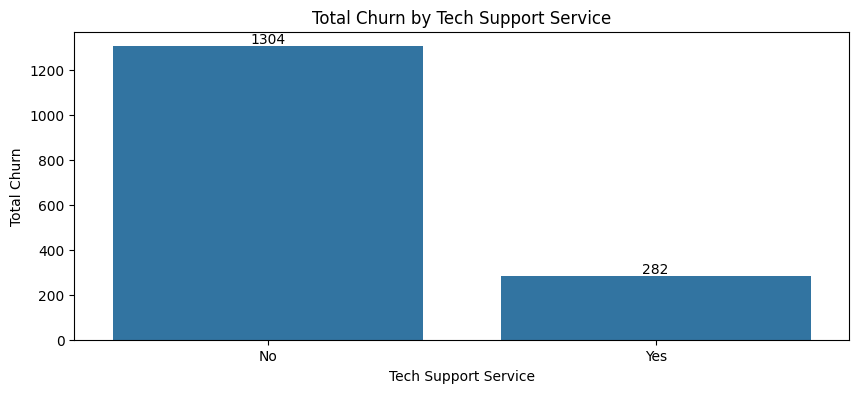

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='TechSupport', y='Total_Churn', data=graph_11)

for index, row in graph_11.iterrows():
    plt.text(index, row['Total_Churn'], str(row['Total_Churn']), ha='center', va='bottom')

plt.title('Total Churn by Tech Support Service')
plt.xlabel('Tech Support Service')
plt.ylabel('Total Churn')
plt.show()

#####Online Security

In [ ]:
graph_12 = pd.pivot_table(data, index='OnlineSecurity', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_12

churn,OnlineSecurity,0,1
0,No,1779,1320
1,Yes,1470,266


In [ ]:
graph_12 = pd.pivot_table(data, index='OnlineSecurity', columns='churn', values='customerID', aggfunc='count').reset_index()
graph_12 = graph_12[['OnlineSecurity', 1]].rename(columns={1: 'Total_Churn'}).reset_index()
graph_12 = graph_12.sort_values(by='Total_Churn', ascending=False).reset_index(drop=True)
graph_12

churn,index,OnlineSecurity,Total_Churn
0,0,No,1320
1,1,Yes,266


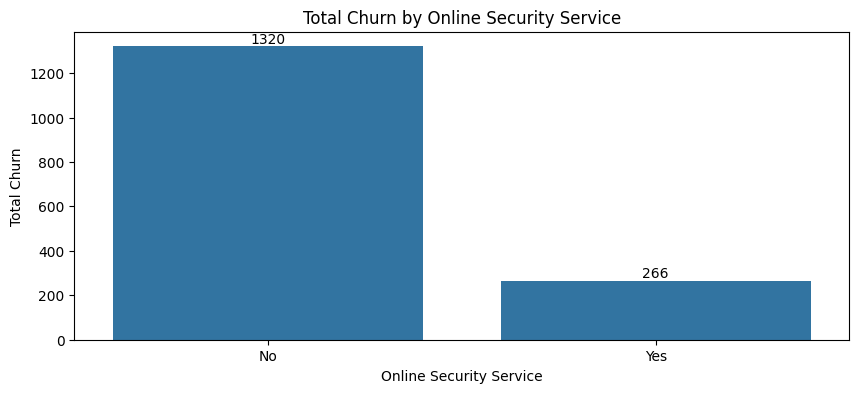

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='OnlineSecurity', y='Total_Churn', data=graph_12)

for index, row in graph_12.iterrows():
    plt.text(index, row['Total_Churn'], str(row['Total_Churn']), ha='center', va='bottom')

plt.title('Total Churn by Online Security Service')
plt.xlabel('Online Security Service')
plt.ylabel('Total Churn')
plt.show()

Finding:

1. The fiber optic user tend to end the service compare to DSL, where the active customer tend to use both fiber optic and DSL equally.
2. There is no significant differences in terms of streaming service in cancelation.
3. The customer that did not include technical support tend to cancel their subscription.
4. The customer that did not include online security tend to cancel their subscription.

###Monthly Payment Distribution

In [ ]:
data_bill = data[['customerID', 'MonthlyCharges', 'churn']]

In [ ]:
data_bill.shape

(4835, 3)

In [ ]:
data_bill.head(3)

,customerID,MonthlyCharges,churn
0,5575-GNVDE,56.95,0
1,3668-QPYBK,53.85,1
2,9237-HQITU,70.70,1


In [ ]:
data_bill_churn = data_bill.loc[(data_bill['churn'] == 1)]

In [ ]:
data_bill_stay = data_bill.loc[(data_bill['churn'] == 0)]

In [ ]:
q1_bill = data_bill_churn['MonthlyCharges'].describe()['25%']
q3_bill = data_bill_churn['MonthlyCharges'].describe()['75%']
iqr_bill = q3_bill - q1_bill

lower_whisker_bill = q1_bill - 1.5 * iqr_bill
upper_whisker_bill = q3_bill + 1.5 * iqr_bill

print("Q1 Churn Customer:", q1_bill)
print("Q3 Churn Customer:", q3_bill)
print("Interquartile Range (IQR) Churn Customer:", iqr_bill)
print("Lower Whisker Churn Customer:", lower_whisker_bill)
print("Upper Whisker Churn Customer:", upper_whisker_bill)

Q1 Churn Customer: 72.2125
Q3 Churn Customer: 95.45
Interquartile Range (IQR) Churn Customer: 23.237499999999997
Lower Whisker Churn Customer: 37.35625000000001
Upper Whisker Churn Customer: 130.30625


In [ ]:
q1_bill = data_bill_stay['MonthlyCharges'].describe()['25%']
q3_bill = data_bill_stay['MonthlyCharges'].describe()['75%']
iqr_bill = q3_bill - q1_bill

lower_whisker_bill = q1_bill - 1.5 * iqr_bill
upper_whisker_bill = q3_bill + 1.5 * iqr_bill

print("Q1 Stay Custumer:", q1_bill)
print("Q3 Stay Custumer:", q3_bill)
print("Interquartile Range (IQR) Stay Custumer:", iqr_bill)
print("Lower Whisker Stay Custumer:", lower_whisker_bill)
print("Upper Whisker Stay Custumer:", upper_whisker_bill)

Q1 Stay Custumer: 68.15
Q3 Stay Custumer: 95.95
Interquartile Range (IQR) Stay Custumer: 27.799999999999997
Lower Whisker Stay Custumer: 26.45000000000001
Upper Whisker Stay Custumer: 137.65


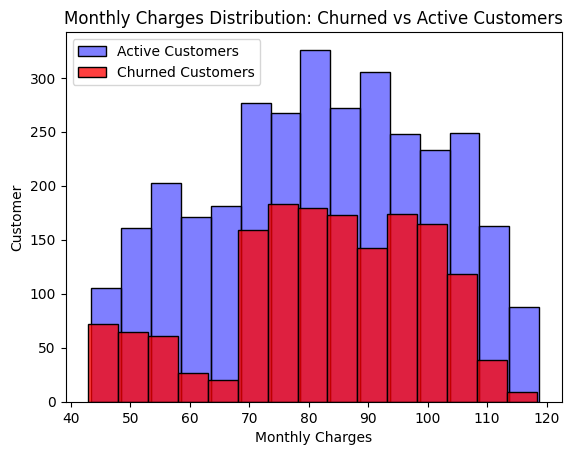

In [ ]:
sns.histplot(data_bill_stay['MonthlyCharges'], bins=15, label='Active Customers', color='blue', alpha=0.5)
sns.histplot(data_bill_churn['MonthlyCharges'], bins=15, label='Churned Customers', color='red')
plt.xlabel('Monthly Charges')
plt.ylabel('Customer')
plt.title('Monthly Charges Distribution: Churned vs Active Customers')
plt.legend()
plt.show()

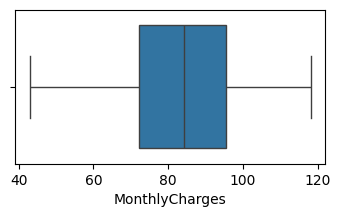

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=data_bill_churn, x='MonthlyCharges')
plt.show()

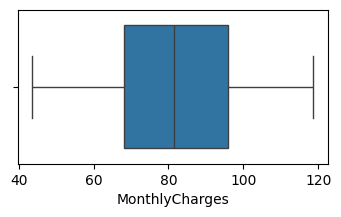

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=data_bill_stay, x='MonthlyCharges')
plt.show()

In [ ]:
mean_monthly_charges = data_bill.groupby('churn')['MonthlyCharges'].mean().reset_index()
mean_monthly_charges.columns = ['Churn', 'Mean_MonthlyCharges']
mean_monthly_charges.head(3)

,Churn,Mean_MonthlyCharges
0,0,81.51362
1,1,82.25000


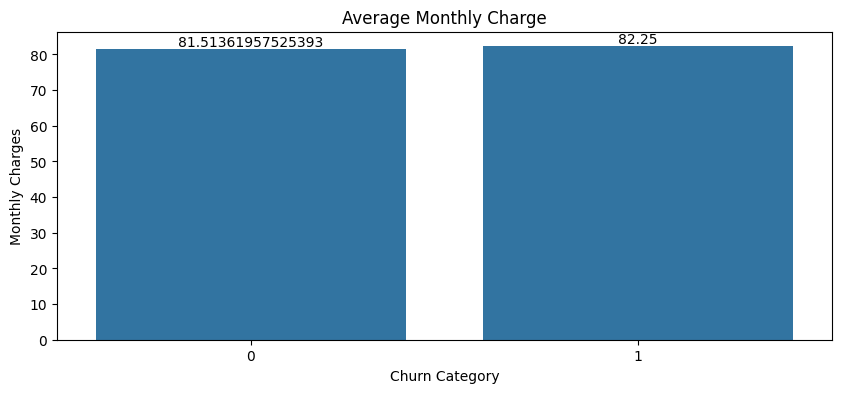

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Churn', y='Mean_MonthlyCharges', data=mean_monthly_charges)

for index, row in mean_monthly_charges.iterrows():
    plt.text(index, row['Mean_MonthlyCharges'], str(row['Mean_MonthlyCharges']), ha='center', va='bottom')

plt.title('Average Monthly Charge')
plt.xlabel('Churn Category')
plt.ylabel('Monthly Charges')
plt.show()

###Telephone vs Internet User

In [ ]:
data_int = pd.merge(data_internet, data_contract, on='customerID', how='outer')

In [ ]:
data_int.shape

(7043, 15)

In [ ]:
data_int['InternetService'] = data_int['InternetService'].fillna('No Service')
data_int['internet_user'] = data_int['InternetService'].apply(lambda x: 'No Internet Service' if x == 'No Service' else 'With Internet Service')

print(data_int['internet_user'].unique())
data_int.head(3)

['With Internet Service' 'No Internet Service']


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,internet_user
0,7590-VHVEG,DSL,No,Yes,No,No,No,No,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,With Internet Service
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,With Internet Service
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,With Internet Service


In [ ]:
data_int['internet_user'].unique()

array(['With Internet Service', 'No Internet Service'], dtype=object)

In [ ]:
internet_user = data_int[['customerID', 'internet_user']]
internet_user.head(2)

,customerID,internet_user
0,7590-VHVEG,With Internet Service
1,5575-GNVDE,With Internet Service


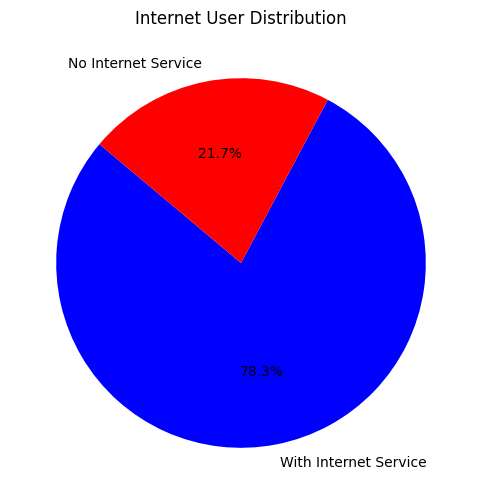

In [ ]:
internet_user_counts = data_int['internet_user'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(internet_user_counts, labels=internet_user_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
plt.title('Internet User Distribution')
plt.show()

In [ ]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
data_pho = pd.merge(data_contract, data_phone, on='customerID', how='outer')

In [ ]:
data_pho.shape

(7043, 9)

In [ ]:
data_pho['MultipleLines'] = data_pho['MultipleLines'].fillna('No Service')
data_pho['phone_user'] = data_pho['MultipleLines'].apply(lambda x: 'No Phone Service' if x == 'No Service' else 'With Phone Service')

print(data_pho['phone_user'].unique())
data_pho.head(3)

['No Phone Service' 'With Phone Service']


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,phone_user
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,No Service,No Phone Service
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,No,With Phone Service
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,No,With Phone Service


In [ ]:
phone_user = data_pho[['customerID', 'phone_user']]
phone_user.head(2)

,customerID,phone_user
0,7590-VHVEG,No Phone Service
1,5575-GNVDE,With Phone Service


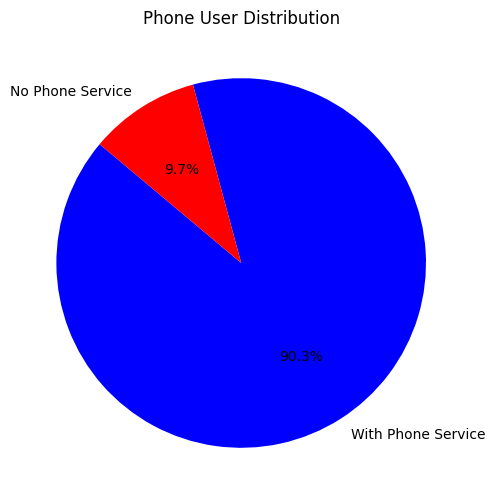

In [ ]:
phone_user_counts = phone_user['phone_user'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(phone_user_counts, labels=phone_user_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
plt.title('Phone User Distribution')
plt.show()

###Summary

Based on statistical calculation for monthly payment distribution between churn and stay customer, the result are as below:

1. 1st Quartile
  - Q1 Churn Customer: 72.2125
  - Q1 Stay Custumer: 68.15

2. 3rd Quartile
  - Q3 Churn Customer: 95.45
  - Q3 Stay Custumer: 95.95

3. Interquartile Range (IQR)
  - Churn Customer: 23.237499999999997
  - Stay Custumer: 27.799999999999997

4. Lower Whisker
  - Churn Customer: 37.35625000000001
  - Stay Custumer: 26.45000000000001

5. Upper Whisker
  - Churn Customer: 130.30625
  - Stay Custumer: 137.65

6. Average Monthly Charge
  - Churn: 82.25000
  - Stay: 81.51362

There is no significant difference when it comes to average monthly payment between churn customer and stay customer. The distribution of monthly charges shows that churn customers generally pay slightly higher charges on average and have a smaller interquartile range compared to stay customers. This indicates that churn customers' monthly charges are less variable and are slightly higher overall. The whiskers suggest that stay customers have both lower minimum and higher maximum charges, suggesting a wider spread of monthly charges among stay customers.

Based on statistical calculation for distribution of customer who using the service of telephone and phone, the result are as below:

1. Only 21.7% of customer do not include the internet service on their plan, meanwhile the rest 78.3% are covered by internet service.
2. Only 9.7% of customer do not include the phone service on their plan, meanwhile the rest 90.3% are covered by phone service.


##Work Plan



As stated before, the goal of this project is to have machine learning model to predict potential churn customer. The indicator of success of this project is having AUC - ROC above or equal to 0.88. Therefore the working plan is as below:

1. Data preparation. Start with little adjustment of font fot the data, make sure to have proper type of data, etc. The next steps are one-hot-encoding the united data since categorycal data has found.
2. Creating machine learning model. After the data proper to develop the machine learning model. We can start with spliting data into target and feature also deleted the unecessary columns.
- Target data: churn
- Feature data: Type, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, MultipleLines, gender, SeniorCitizen, Partner, Dependents, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.
- Unecessary data: customerID, BeginDate and EndDate.
3. Split the data into test and train, where 20% is the test size.
4. Develop loop for checking the AUC-ROC score.
5. Several model will be try such as logistic regression, random forest classifier or XG Boost Classifier.
6. Draw conclusion.